# MRI Brain Tumor Classification

The goal of this notebook is to implement an MRI image classifier, and test it on a brain tumor classification task.

### About the data
This dataset contains 3272 images of human brain MRI images which are classified into 4 classes: glioma - meningioma - no tumor and pituitary.

Dataset source: 
https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/data

In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

### Using the right computation architecture - CPU vs GPU

In [2]:
# Set the device for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Loading and visualizing the data

#### Q1. Plot the label distribution, are the classes well balanced?

In [3]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms


mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

# Data preprocessing and augmentation
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    # Add data augmentation here:
    # For example: transforms.RandomHorizontalFlip, transforms.RandomRotation
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])


train_dataset = ImageFolder('brain_mri/Training', transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = ImageFolder('brain_mri/Testing', transform=data_transforms)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


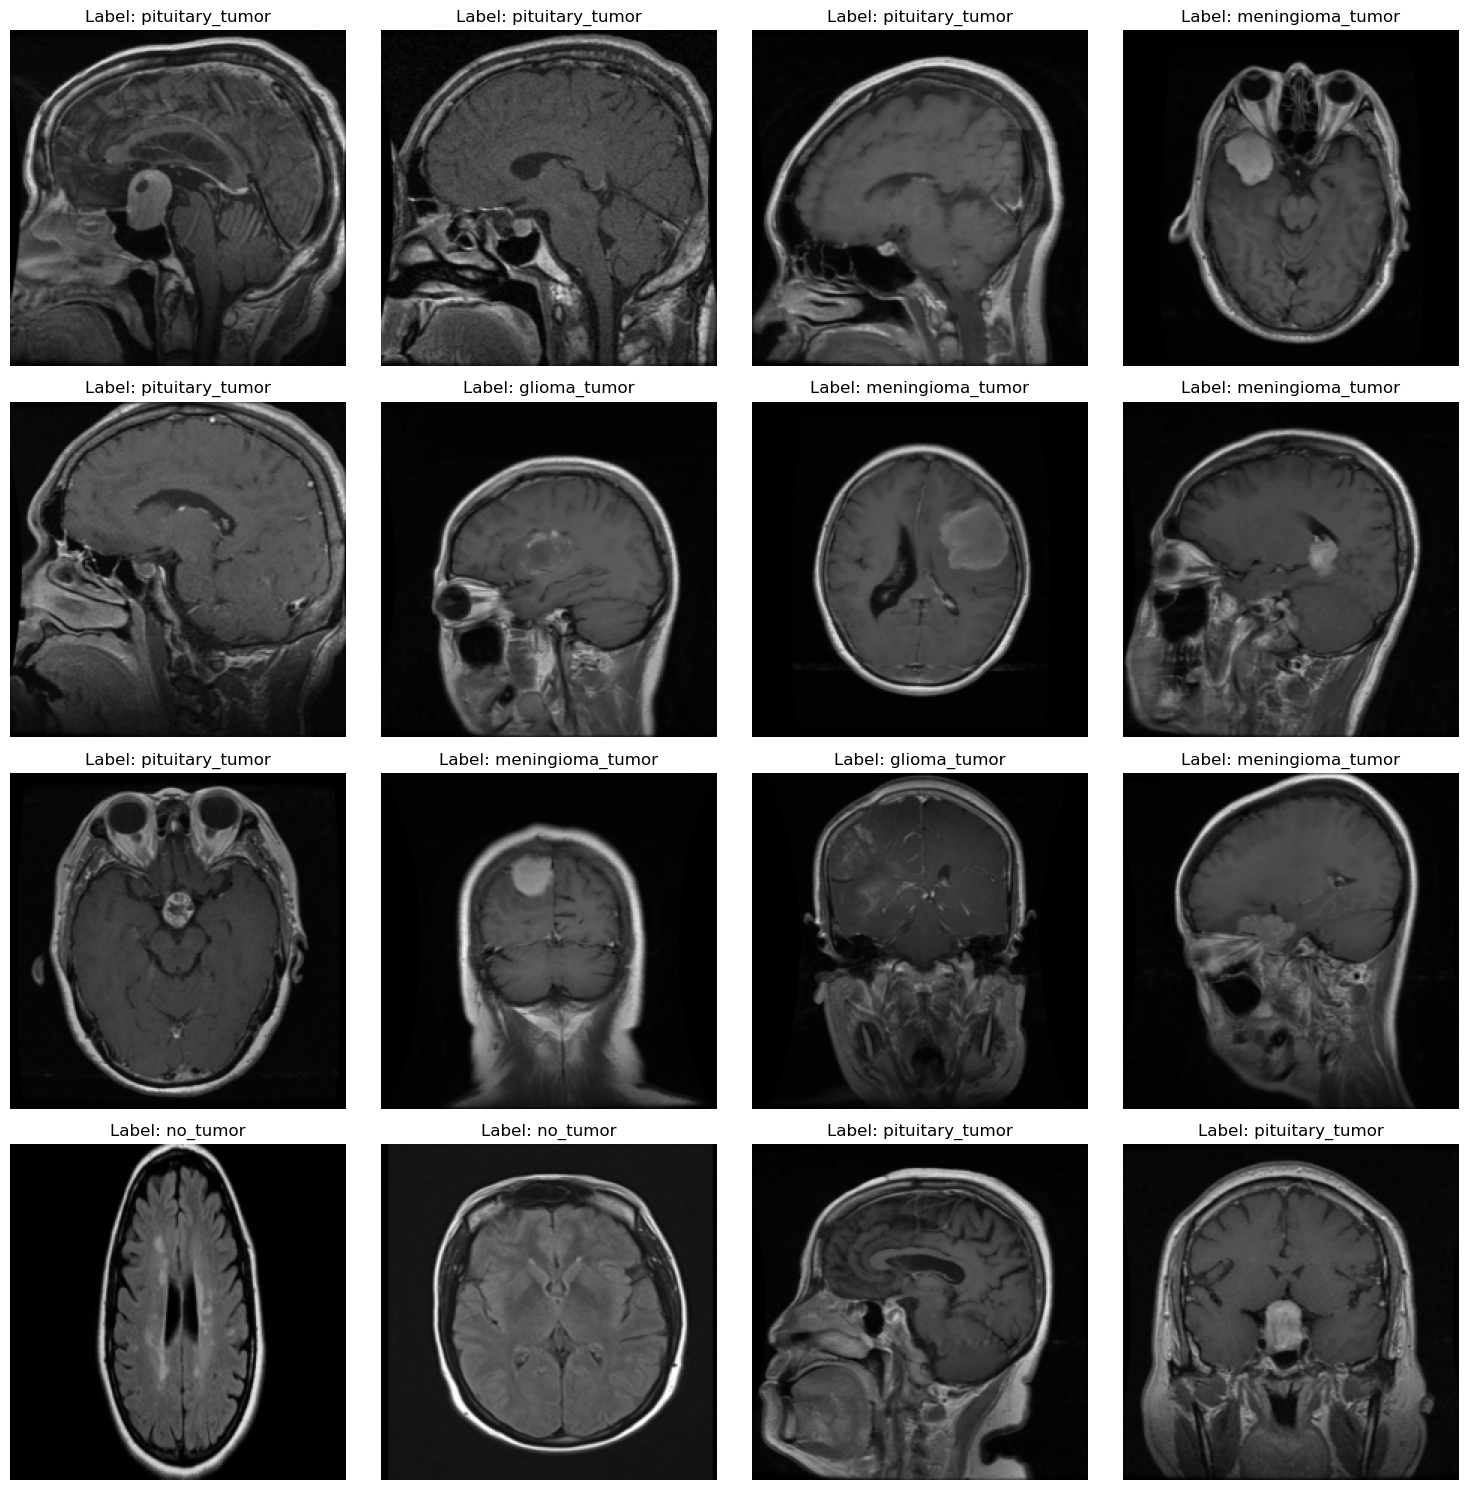

In [4]:
# Load a batch of images and labels for visualization
images, labels = next(iter(train_loader))

# Convert images to numpy arrays and denormalize
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
images = (images.numpy().transpose((0, 2, 3, 1)) * std + mean).clip(0, 1)

# Create a grid of images
num_images = len(images)
rows = int(np.ceil(num_images / 4))
fig, axes = plt.subplots(rows, 4, figsize=(15, 15))

# Plot images with labels
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(images[i])
        ax.set_title(f'Label: {train_dataset.classes[labels[i]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Model

### Q2.a. Define your own CNN
Choose the number of layers, the kernel sizes, the number of channels, the non-linearity.

The features of the CNN are given to an MLP classifier.

In [ ]:
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(...),
            nn.ReLU(...),
            nn.MaxPool2d(...),
            ...,
        )
        self.classifier = nn.Sequential(
            nn.Linear(..., 32),
            nn.ReLU(inplace=True),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        # Compute the CNN features
        x = ...
        # Flatten the features before the classifier
        x = ...
        # Pass the features through the classifier
        x = ...
        return x

model = CNNClassifier(num_classes=4)
model.to(device)

## Model Training & Evaluation

### Q3.b. Train the model for a few epochs, check the validation accuracy.

You can re-use the training and evaluation functions from the `01-intro-pytorch.ipynb` notebook.

### Q3.b. Improve the performance to at least 80% validation accuracy
You can use data augmentation, change the model architecture, change the learning rate...

In [ ]:
n_epochs = 2
optimizer = 
criterion = 

def train():

def evaluate():



### Visualization 

#### Q3.c. Show some images for which your classifier fails

#### Q3.d. Plot the learned convolution filters

In [ ]:
def visualize_image_conv_filters(layer, num_filters=None):
    """
    Visualizes the filters of a convolutional layer in black and white.

    Parameters:
    - layer (nn.Conv2d): The convolutional layer to visualize.
    - num_filters (int, optional): The number of filters to visualize. If None, visualize all filters.
    """
    filters = layer.weight.data.cpu().numpy()
    
    if num_filters is not None:
        filters = filters[:num_filters]

    num_filters, depth, height, width = filters.shape

    fig, axes = plt.subplots(1, num_filters, figsize=(num_filters * 2, 2), constrained_layout=True)

    if num_filters == 1:
        axes = [axes]

    for i in range(num_filters):
        ax = axes[i]
        
        # Normalize the filter values to 0-1 for better visualization
        filter_min = filters[i].min()
        filter_max = filters[i].max()
        filter_normalized = (filters[i] - filter_min) / (filter_max - filter_min)

        # For grayscale filters, take the first channel or average all channels
        if depth == 1:
            ax.imshow(filter_normalized[0], cmap='gray', interpolation='nearest')
        else:
            ax.imshow(np.mean(filter_normalized, axis=0), cmap='gray', interpolation='nearest')

        ax.axis('off')
        ax.set_title(f'Filter {i+1}')

    plt.show()

    visualize_image_conv_filters(model.features[0])

### Loading a pretrained model

#### Q4.a. Load a pretrained model from pytorch, combine its features with your own classifier



In [ ]:
import torchvision.models as models

# Load a pretrained model of your choice.
mobilenet_pretrained = models.mobilenet_v2(pretrained=True).to(device) 
# Its features can be accessed with:
mobilenet_pretrained.features                             

# Create a custom classifying head
classifier = nn.Sequential(
            nn.Linear(..., 32),
            nn.ReLU(inplace=True),
            nn.Linear(32, 4)
        )

# Combine the two:
full_model = ...

#### Q4.b. Train the combined model

Make sure the pretrained weights are **frozen** and only optimize the classifier!

#### Q4.b. Compare the accuracy of the pretrained model to your first model trained from scratch
